In [1]:
!kaggle datasets download -d andrewmvd/face-mask-detection

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/face-mask-detection
License(s): CC0-1.0
 95% 379M/398M [00:05<00:00, 85.3MB/s]
100% 398M/398M [00:05<00:00, 82.3MB/s]


In [2]:
!unzip /content/face-mask-detection.zip

Archive:  /content/face-mask-detection.zip
  inflating: annotations/maksssksksss0.xml  
  inflating: annotations/maksssksksss1.xml  
  inflating: annotations/maksssksksss10.xml  
  inflating: annotations/maksssksksss100.xml  
  inflating: annotations/maksssksksss101.xml  
  inflating: annotations/maksssksksss102.xml  
  inflating: annotations/maksssksksss103.xml  
  inflating: annotations/maksssksksss104.xml  
  inflating: annotations/maksssksksss105.xml  
  inflating: annotations/maksssksksss106.xml  
  inflating: annotations/maksssksksss107.xml  
  inflating: annotations/maksssksksss108.xml  
  inflating: annotations/maksssksksss109.xml  
  inflating: annotations/maksssksksss11.xml  
  inflating: annotations/maksssksksss110.xml  
  inflating: annotations/maksssksksss111.xml  
  inflating: annotations/maksssksksss112.xml  
  inflating: annotations/maksssksksss113.xml  
  inflating: annotations/maksssksksss114.xml  
  inflating: annotations/maksssksksss115.xml  
  inflating: annotation

In [3]:
import xml.etree.ElementTree as ET

In [10]:
import os
import glob
import xml.etree.ElementTree as ET

# Define the directory where you want to save the YOLO annotation files
output_dir = '/content/labels'
os.makedirs(output_dir, exist_ok=True)

# Mapping from VOC class names to YOLO class IDs
class_mapping = {
    'with_mask': 0,
    'without_mask': 1,
    'mask_weared_incorrect': 2,
    # Add other classes as needed
}
def convert_voc_to_yolo(xml_file, output_dir):
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()

        image_width = int(root.find('size/width').text)
        image_height = int(root.find('size/height').text)

        # Get the base filename without extension
        base_filename = os.path.splitext(os.path.basename(xml_file))[0]

        # Create the output file path
        output_file = os.path.join(output_dir, base_filename + '.txt')

        with open(output_file, 'w') as f:
            for obj in root.findall('object'):
                class_name = obj.find('name').text
                if class_name not in class_mapping:
                    print(f"Warning: Class '{class_name}' '{base_filename}'not in class_mapping. Skipping.")
                    continue

                class_id = class_mapping[class_name]
                bbox = obj.find('bndbox')
                xmin = int(bbox.find('xmin').text)
                ymin = int(bbox.find('ymin').text)
                xmax = int(bbox.find('xmax').text)
                ymax = int(bbox.find('ymax').text)

                # Calculate normalized coordinates
                x_center = (xmin + xmax) / 2.0 / image_width
                y_center = (ymin + ymax) / 2.0 / image_height
                width = (xmax - xmin) / float(image_width)
                height = (ymax - ymin) / float(image_height)

                # Write to file
                f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

        print(f"Successfully converted {xml_file} to {output_file}")
    except Exception as e:
        print(f"Error processing {xml_file}: {e}")

# Example usage:
input_dir='/content/data/annotations'
xml_files = glob.glob(os.path.join(input_dir, '*.xml'))

for xml_file in xml_files:
    convert_voc_to_yolo(xml_file, output_dir)


Successfully converted /content/data/annotations/maksssksksss443.xml to /content/labels/maksssksksss443.txt
Successfully converted /content/data/annotations/maksssksksss492.xml to /content/labels/maksssksksss492.txt
Successfully converted /content/data/annotations/maksssksksss520.xml to /content/labels/maksssksksss520.txt
Successfully converted /content/data/annotations/maksssksksss131.xml to /content/labels/maksssksksss131.txt
Successfully converted /content/data/annotations/maksssksksss323.xml to /content/labels/maksssksksss323.txt
Successfully converted /content/data/annotations/maksssksksss259.xml to /content/labels/maksssksksss259.txt
Successfully converted /content/data/annotations/maksssksksss264.xml to /content/labels/maksssksksss264.txt
Successfully converted /content/data/annotations/maksssksksss807.xml to /content/labels/maksssksksss807.txt
Successfully converted /content/data/annotations/maksssksksss540.xml to /content/labels/maksssksksss540.txt
Successfully converted /cont

In [11]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [13]:
import os
import shutil
import random
from glob import glob

# Paths to the images and annotations directories
images_dir = '/content/data/images'
annotations_dir = '/content/data/labels'

# Output directories
train_images_dir = '/content/mask_detection_data/train/images'
train_annotations_dir = '/content/mask_detection_data/train/labels'
val_images_dir = '/content/mask_detection_data/val/images'
val_annotations_dir = '/content/mask_detection_data/val/labels'

# Create the output directories if they don't exist
os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(train_annotations_dir, exist_ok=True)
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(val_annotations_dir, exist_ok=True)

# Get a list of all image files
image_files = glob(os.path.join(images_dir, '*.png'))  # or '*.png' depending on your image format

# Shuffle the list of image files
random.shuffle(image_files)

# Split the data: 80% training, 20% validation
split_ratio = 0.8
split_index = int(len(image_files) * split_ratio)
train_files = image_files[:split_index]
val_files = image_files[split_index:]

# Helper function to move corresponding annotation files
def move_files(file_list, target_image_dir, target_annotation_dir):
    for image_file in file_list:
        # Get the base name of the file (without extension)
        base_name = os.path.basename(image_file).split('.')[0]

        # Define the corresponding annotation file
        annotation_file = os.path.join(annotations_dir, base_name + '.txt')

        # Move the image and annotation files to the respective directories
        shutil.copy(image_file, target_image_dir)
        shutil.copy(annotation_file, target_annotation_dir)

# Move the training files
move_files(train_files, train_images_dir, train_annotations_dir)

# Move the validation files
move_files(val_files, val_images_dir, val_annotations_dir)

print(f"Training files: {len(train_files)}")
print(f"Validation files: {len(val_files)}")


Training files: 682
Validation files: 171


In [28]:
from ultralytics import YOLO
model=YOLO('yolov8n.pt')
model.train(data='/content/data.yaml',epochs=20)

Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

train: Scanning /content/mask_detection_data/train/labels.cache... 682 images, 0 backgrounds, 0 corrupt: 100%|██████████| 682/682 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/mask_detection_data/val/labels.cache... 171 images, 0 backgrounds, 0 corrupt: 100%|██████████| 171/171 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.14G      1.727      2.676      1.365         85        640: 100%|██████████| 43/43 [00:23<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.45it/s]

                   all        171        815     0.0111      0.519       0.26      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.36G      1.299      1.428       1.09        139        640: 100%|██████████| 43/43 [00:20<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]

                   all        171        815      0.536        0.2      0.303      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.71G      1.304      1.247       1.08        101        640: 100%|██████████| 43/43 [00:18<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.38it/s]


                   all        171        815      0.471      0.437       0.48      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.03G       1.28       1.12       1.06         57        640: 100%|██████████| 43/43 [00:18<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.38it/s]

                   all        171        815      0.498      0.483      0.497      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.67G      1.212      1.039      1.041        102        640: 100%|██████████| 43/43 [00:19<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.71it/s]

                   all        171        815      0.767      0.516      0.568      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.34G      1.183      0.953      1.029         77        640: 100%|██████████| 43/43 [00:20<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.67it/s]

                   all        171        815      0.731      0.592      0.663      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.54G      1.191     0.9151      1.037         68        640: 100%|██████████| 43/43 [00:20<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.67it/s]


                   all        171        815      0.586      0.664      0.667      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.71G      1.161     0.8707      1.016         86        640: 100%|██████████| 43/43 [00:20<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.78it/s]

                   all        171        815      0.759      0.662       0.74      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.72G      1.139     0.8414      1.017         84        640: 100%|██████████| 43/43 [00:20<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.81it/s]


                   all        171        815      0.804      0.604      0.732      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.65G      1.115     0.7891      1.003         85        640: 100%|██████████| 43/43 [00:19<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all        171        815      0.739       0.71      0.768      0.497


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.79G      1.122     0.8326     0.9994         18        640: 100%|██████████| 43/43 [00:24<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]


                   all        171        815      0.884      0.676      0.765      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.52G      1.117     0.8094     0.9974         43        640: 100%|██████████| 43/43 [00:20<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.00it/s]

                   all        171        815        0.8      0.686      0.749      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.73G      1.087     0.7615     0.9879         30        640: 100%|██████████| 43/43 [00:19<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.86it/s]

                   all        171        815      0.853      0.697      0.782      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.58G      1.069     0.7227     0.9772         62        640: 100%|██████████| 43/43 [00:19<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.82it/s]


                   all        171        815      0.834      0.717      0.811      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.56G      1.048      0.711     0.9687         35        640: 100%|██████████| 43/43 [00:19<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.77it/s]

                   all        171        815      0.844      0.671      0.771      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.56G      1.027     0.6609     0.9607         15        640: 100%|██████████| 43/43 [00:19<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.04it/s]

                   all        171        815      0.807      0.705      0.774      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.62G      1.035       0.65     0.9666         35        640: 100%|██████████| 43/43 [00:20<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.80it/s]

                   all        171        815      0.857      0.704      0.809      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.56G      1.028     0.6401     0.9646         98        640: 100%|██████████| 43/43 [00:20<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.72it/s]


                   all        171        815      0.817      0.689      0.793      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.59G      1.002     0.6049     0.9498         36        640: 100%|██████████| 43/43 [00:19<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.29it/s]

                   all        171        815        0.9      0.698      0.819      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.77G     0.9893     0.5933     0.9395         25        640: 100%|██████████| 43/43 [00:17<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.73it/s]

                   all        171        815      0.912      0.671      0.809      0.543



20 epochs completed in 0.142 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.2MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.73s/it]


                   all        171        815        0.9      0.698      0.819      0.548
             with_mask        151        575      0.929      0.904       0.95       0.67
          without_mask         68        209      0.905      0.774      0.885      0.543
 mask_weared_incorrect         21         31      0.865      0.414      0.621      0.431
Speed: 1.4ms preprocess, 4.6ms inference, 0.0ms loss, 5.7ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7880c60d7e50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [29]:
model.predict('/content/mask_detection_data/val/images/maksssksksss109.png',save=True)


image 1/1 /content/mask_detection_data/val/images/maksssksksss109.png: 640x640 1 with_mask, 11.4ms
Speed: 3.5ms preprocess, 11.4ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train42


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'with_mask', 1: 'without_mask', 2: 'mask_weared_incorrect'}
 obb: None
 orig_img: array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 254],
         [255, 254, 254],
         [255, 254, 254]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 254, 254],
         [255, 254, 254],
         [255, 254, 254]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 254, 254],
         [255, 254, 254],
         [255, 254, 254]],
 
        ...,
 
        [[255, 255, 254],
         [255, 255, 254],
         [255, 255, 254],
         ...,
         [ 73,  69,  70],
         [ 83,  81,  81],
         [ 72,  70,  70]],
 
        [[255, 255, 254],
         [255, 255, 254],
        

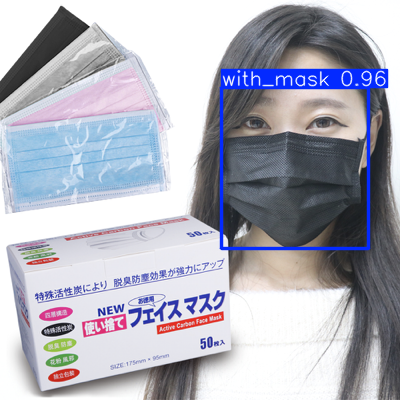

In [31]:
pr=cv.imread('/content/runs/detect/train42/maksssksksss109.png')
cv2_imshow(pr)

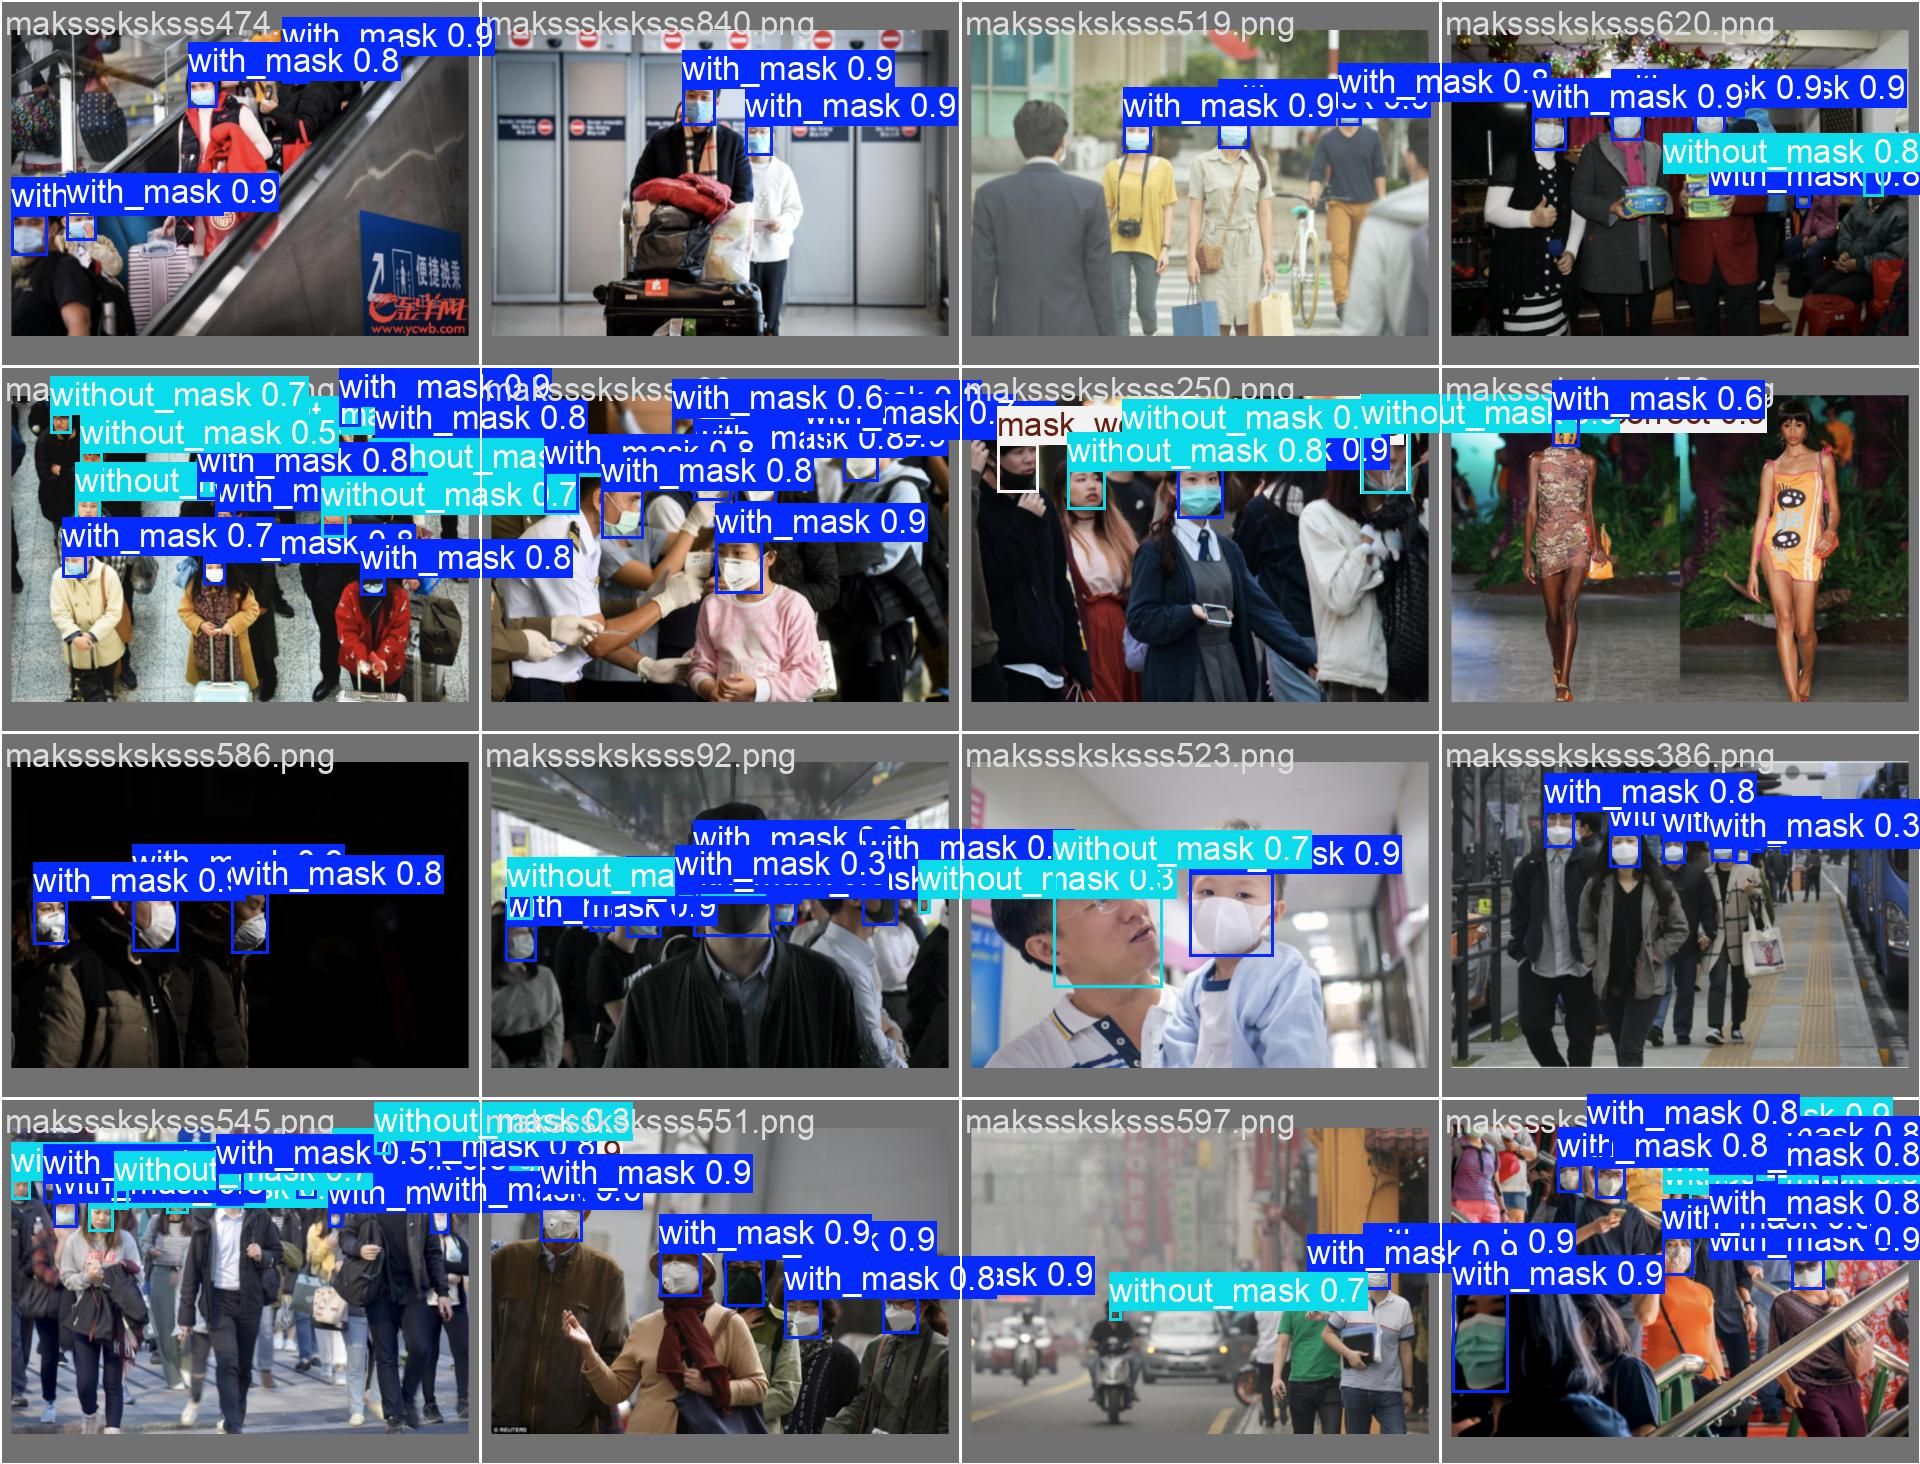

In [33]:
train_img=cv.imread('/content/runs/detect/train4/val_batch2_pred.jpg')
cv2_imshow(train_img)

In [34]:
model.predict('https://youtu.be/7iUxagedpWA?si=BZXKXgpwzlsvVZEQ',save=True)


requirements: Ultralytics requirement ['pytubefix>=6.5.2'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 5.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.9s, installed 1 package: ['pytubefix>=6.5.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

1/1: https://youtu.be/7iUxagedpWA?si=BZXKXgpwzlsvVZEQ... Success ✅ (900 frames of shape 1920x1080 at 29.97 FPS)


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

0: 384x6

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'with_mask', 1: 'without_mask', 2: 'mask_weared_incorrect'}
 obb: None
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
       